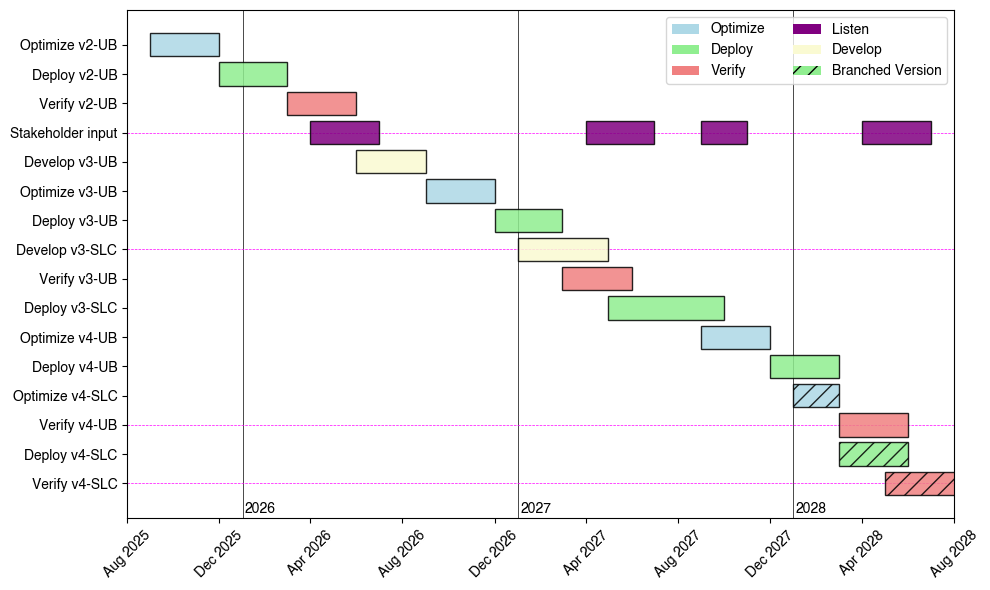

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# Define the categories and colors for each task
category_colors = {
    "optimize": 'lightblue', 
    "deploy": 'lightgreen', 
    "verify": 'lightcoral', 
    "develop": 'lightgoldenrodyellow',
    "listen": 'purple'
}
category_hatch = {
    "optimize": '', 
    "deploy": '', 
    "verify": '', 
    "develop": '',
    "listen": ''
}
# Add hatching for branched versions
branch_hatch = '//'

# List of tasks without explicit categories
tasks = [
    {"Task": "Optimize v2-UB", "Start": "2025-09", "End": "2025-12"},
    {"Task": "Deploy v2-UB", "Start": "2025-12", "End": "2026-03"},
    {"Task": "Verify v2-UB", "Start": "2026-03", "End": "2026-06"},
    {"Task": "Stakeholder input", "Start": "2026-04", "End": "2026-07"},
    {"Task": "Develop v3-UB", "Start": "2026-06", "End": "2026-09"},
    {"Task": "Optimize v3-UB", "Start": "2026-09", "End": "2026-12"},
    {"Task": "Deploy v3-UB", "Start": "2026-12", "End": "2027-03"},
    {"Task": "Develop v3-SLC", "Start": "2027-01", "End": "2027-05"},
    {"Task": "Verify v3-UB", "Start": "2027-03", "End": "2027-06"},
    {"Task": "Stakeholder input", "Start": "2027-04", "End": "2027-07"},
    {"Task": "Deploy v3-SLC", "Start": "2027-05", "End": "2027-10"},
    {"Task": "Stakeholder input", "Start": "2027-09", "End": "2027-11"},
    {"Task": "Optimize v4-UB", "Start": "2027-09", "End": "2027-12"},
    {"Task": "Deploy v4-UB", "Start": "2027-12", "End": "2028-03"},
    {"Task": "Optimize v4-SLC", "Start": "2028-01", "End": "2028-03"},
    {"Task": "Verify v4-UB", "Start": "2028-03", "End": "2028-06"},
    {"Task": "Stakeholder input", "Start": "2028-04", "End": "2028-07"},
    {"Task": "Deploy v4-SLC", "Start": "2028-03", "End": "2028-06"},
    {"Task": "Verify v4-SLC", "Start": "2028-05", "End": "2028-09"}
]

# Create a DataFrame with task durations
df_updated = pd.DataFrame(tasks)
df_updated['Start'] = pd.to_datetime(df_updated['Start'])
df_updated['End'] = pd.to_datetime(df_updated['End'])

# Set font to Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Function to assign categories based on task name
def assign_category(task):
    if 'optimize' in task.lower():
        return 'optimize'
    elif 'deploy' in task.lower():
        return 'deploy'
    elif 'verify' in task.lower():
        return 'verify'
    elif 'develop' in task.lower():
        return 'develop'
    elif 'stakeholder' in task.lower() or 'input' in task.lower():
        return 'listen'
    else:
        return 'develop'  # default category if nothing matches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each task with logic to determine category and hatching
for index, row in df_updated.iterrows():
    task_category = assign_category(row['Task'])
    hatch = branch_hatch if 'v4-SLC' in row['Task'] else category_hatch[task_category]
    ax.barh(row['Task'], (row['End'] - row['Start']).days, left=row['Start'], align='center',
            color=category_colors[task_category], hatch=hatch, edgecolor='black', linewidth=1, alpha=0.85, zorder=2)

# Format the x-axis with date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Flip the y-axis
ax.invert_yaxis()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add vertical lines for the three New Years
ax.axvline(pd.to_datetime('2026-01-01'), color='black', linewidth=0.5, zorder=1)
ax.axvline(pd.to_datetime('2027-01-01'), color='black', linewidth=0.5, zorder=1)
ax.axvline(pd.to_datetime('2028-01-01'), color='black', linewidth=0.5, zorder=1)

# Labels and title
# ax.set_xlabel('Time')
# ax.set_title('Project Timeline: Development and Deployment of Forecast Models')

# Create a custom legend
legend_elements = [
    Patch(facecolor=category_colors["optimize"], label="Optimize"),
    Patch(facecolor=category_colors["deploy"], label="Deploy"),
    Patch(facecolor=category_colors["verify"], label="Verify"),
    Patch(facecolor=category_colors["listen"], label="Listen"),
    Patch(facecolor=category_colors["develop"], label="Develop"),
    Patch(facecolor=category_colors["deploy"], hatch=branch_hatch, label="Branched Version")
]
ax.legend(handles=legend_elements, loc='upper right', ncol=2)

# Add horizontal dashed lines for key milestone tasks when completed
milestone_tasks = ["Stakeholder input", "Verify v4-UB", "Verify v4-SLC", "Develop v3-SLC"]
for task in milestone_tasks:
    task_row = df_updated[df_updated['Task'] == task]
    if not task_row.empty:
        ax.axhline(task_row['Task'].values[0], color='magenta', linestyle='--', linewidth=0.5, zorder=1)

# To the bottom of the y-axis and just to the right of each vertical line denoting a new year, add the year in text
max_y = len(df_updated) - 3.0

years = [2026, 2027, 2028]
x_positions = [pd.to_datetime(f'{year}-01-04') for year in years]

# Add the year text to the bottom of the y-axis
for x, year in zip(x_positions, years):
    ax.text(x, max_y, str(year), color='black', ha='left')

# x-axis should only go up to August 2028
ax.set_xlim(pd.to_datetime('2025-08-01'), pd.to_datetime('2028-08-01'))

# Display the timeline
plt.tight_layout()
plt.show()
